# **Empirical demonstration**

This notebook contains the replicable code for the empirical demonstration in the paper "Encoding systems of geographic information in quantum density matrices" (under review).

Begin by installing and importing necessary libraries and dependencies.

In [ ]:
%%capture
pip install census

In [ ]:
%%capture
!pip install qutip

In [ ]:
%%capture
pip install us

In [ ]:
%%capture
pip install geopandas

In [ ]:
%%capture
pip install lehd

In [ ]:
%%capture
pip install statsmodels

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from census import Census
from us import states
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from scipy.linalg import logm
import statsmodels.api as sm
from statsmodels.api import OLS

In [ ]:
with open('/content/drive/MyDrive/Defense/census_api_key.txt', "r") as f:
    c = Census(f.read().replace('\n', ''))

Retrieve and clean variables of interest from the 2009:2019 American Community Survey (ACS) 5-year estimates (a product of the US Census).

The list of ACS variables is available here: https://api.census.gov/data/2019/acs/acs5/variables.html

Though this site is easier to navigate: https://censusreporter.org/topics/table-codes/

Pull data at the census tract level for (1) total pop, (2) n housing units, (3) household income by value, (4) population employed - manufacturing, (5) population employed - healthcare.

In [ ]:
# B25121_073E : household income ~50k by value 100-199k
# B25121_001E : household income by value
# B25077_001E : median home value
# B19013_001E : median household income
# B23025_004E : total in labor force - employed
# B25001_001E : total housing units
# C24050_004E : pop employed - mfg
# C24050_011E : pop employed - ehhs

year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
length = len(year)

austintown09 = c.acs5.state_county_tract(fields = ('NAME','B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "812601",
                                      year = 2009) # doesn't let us loop through the years
austintown10 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "812601",
                                      year = 2010) # hard coding the years
austintown11 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "812601",
                                      year = 2011) # hard coding the years
austintown12 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "812601",
                                      year = 2012) # hard coding the years
austintown13 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "812601",
                                      year = 2013) # hard coding the years   
austintown14 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "812601",
                                      year = 2014) # hard coding the years 
austintown15 = c.acs5.state_county_tract(fields = ('NAME','B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "812601",
                                      year = 2015) # hard coding the years
austintown16 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "812601",
                                      year = 2016) # hard coding the years
austintown17 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "812601",
                                      year = 2017) # hard coding the years
austintown18 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "812601",
                                      year = 2018) # hard coding the years   
austintown19 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "812601",
                                      year = 2019) # hard coding the years                                                                         



In [ ]:
austintown09 = pd.DataFrame(austintown09)
austintown10 = pd.DataFrame(austintown10)
austintown11 = pd.DataFrame(austintown11)
austintown12 = pd.DataFrame(austintown12)
austintown13 = pd.DataFrame(austintown13)
austintown14 = pd.DataFrame(austintown14)
austintown15 = pd.DataFrame(austintown15)
austintown16 = pd.DataFrame(austintown16)
austintown17 = pd.DataFrame(austintown17)
austintown18 = pd.DataFrame(austintown18)
austintown19 = pd.DataFrame(austintown19)

df_09_14 = (austintown09, austintown10, austintown11, austintown12, austintown13, austintown14,
            austintown15, austintown16, austintown17, austintown18, austintown19)

df = pd.concat(df_09_14, ignore_index = True)

df = pd.DataFrame(df)

df.head(10)

,NAME,B25001_001E,B25121_001E,B25077_001E,B19013_001E,C24050_004E,C24050_011E,state,county,tract
0,"Census Tract 8126.01, Mahoning County, Ohio",2809.0,673.0,85100.0,28845.0,463.0,475.0,39,099,812601
1,"Census Tract 8126.01, Mahoning County, Ohio",2822.0,760.0,84100.0,28628.0,428.0,493.0,39,099,812601
2,"Census Tract 8126.01, Mahoning County, Ohio",2797.0,751.0,84800.0,29571.0,323.0,465.0,39,099,812601
3,"Census Tract 8126.01, Mahoning County, Ohio",2858.0,751.0,86700.0,28163.0,259.0,512.0,39,099,812601
4,"Census Tract 8126.01, Mahoning County, Ohio",2759.0,707.0,88600.0,26535.0,253.0,566.0,39,099,812601
5,"Census Tract 8126.01, Mahoning County, Ohio",2700.0,564.0,93200.0,26220.0,186.0,537.0,39,099,812601
6,"Census Tract 8126.01, Mahoning County, Ohio",2672.0,534.0,92300.0,27038.0,244.0,504.0,39,099,812601
7,"Census Tract 8126.01, Mahoning County, Ohio",2702.0,591.0,89500.0,26526.0,287.0,559.0,39,099,812601
8,"Census Tract 8126.01, Mahoning County, Ohio",2759.0,645.0,85900.0,28599.0,343.0,580.0,39,099,812601
9,"Census Tract 8126.01, Mahoning County, Ohio",2804.0,695.0,87000.0,31533.0,399.0,535.0,39,099,812601


In [ ]:
df['year'] = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


# unable to pull B23025_002E directly, calculate labor force by hand -- 16 & over?? double-check these numbers!!
df['B23025_002E'] = [(3950*.60), (3945*.628), (3824*.649), (3854*.614), (3545*.608), (3360*.602), (3471*.615), (3370*.584), (3467*.617), (3487*.629), (3641*.647)]

df['mfg_rate'] = df['C24050_004E'] / df['B23025_002E']
df['ehss_rate'] = df['C24050_011E'] / df['B23025_002E']
df['income_to_value'] = df['B19013_001E'] / df['B25077_001E']
df['value_to_income'] = df['B25077_001E'] / df['B19013_001E']

In [ ]:
df['B25077_001E'].describe()

count       11.000000
mean     87718.181818
std       2971.806919
min      84100.000000
25%      85500.000000
50%      87000.000000
75%      89050.000000
max      93200.000000
Name: B25077_001E, dtype: float64

In [ ]:
df['B19013_001E'].describe()

count       11.000000
mean     28483.727273
std       1889.452571
min      26220.000000
25%      26786.500000
50%      28599.000000
75%      29208.000000
max      31663.000000
Name: B19013_001E, dtype: float64

In [ ]:
df['income_to_value'].describe()

count    11.000000
mean      0.325406
std       0.028568
min       0.281330
25%       0.297936
50%       0.332934
75%       0.344559
max       0.362448
Name: income_to_value, dtype: float64

In [ ]:
# B25121_073E : household income ~50k by value 100-199k
# B25121_001E : household income by value
# B25077_001E : median home value
# B19013_001E : median household income
# B23025_004E : total in labor force - employed
# B25001_001E : total housing units
# C24050_004E : pop employed - mfg
# C24050_011E : pop employed - ehhs

year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
length = len(year)

wp09 = c.acs5.state_county_tract(fields = ('NAME','B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "804100",
                                      year = 2009) # doesn't let us loop through the years
wp10 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "804100",
                                      year = 2010) # hard coding the years
wp11 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "804100",
                                      year = 2011) # hard coding the years
wp12 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "804100",
                                      year = 2012) # hard coding the years
wp13 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "804100",
                                      year = 2013) # hard coding the years   
wp14 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "804100",
                                      year = 2014) # hard coding the years 
wp15 = c.acs5.state_county_tract(fields = ('NAME','B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "804100",
                                      year = 2015) # hard coding the years
wp16 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "804100",
                                      year = 2016) # hard coding the years
wp17 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "804100",
                                      year = 2017) # hard coding the years
wp18 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "804100",
                                      year = 2018) # hard coding the years   
wp19 = c.acs5.state_county_tract(fields = ('NAME', 'B25001_001E','B25121_001E','B25077_001E','B19013_001E','B25077_001E','C24050_004E', 'C24050_011E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "804100",
                                      year = 2019) # hard coding the years  

In [ ]:
wp09 = pd.DataFrame(wp09)
wp10 = pd.DataFrame(wp10)
wp11 = pd.DataFrame(wp11)
wp12 = pd.DataFrame(wp12)
wp13 = pd.DataFrame(wp13)
wp14 = pd.DataFrame(wp14)
wp15 = pd.DataFrame(wp15)
wp16 = pd.DataFrame(wp16)
wp17 = pd.DataFrame(wp17)
wp18 = pd.DataFrame(wp18)
wp19 = pd.DataFrame(wp19)

wp_09_19 = (wp09, wp10, wp11, wp12, wp13, wp14,
            wp15, wp16, wp17, wp18, wp19)

df_wp = pd.concat(wp_09_19, ignore_index = True)

df_wp = pd.DataFrame(df_wp)

df_wp.head(10)

,NAME,B25001_001E,B25121_001E,B25077_001E,B19013_001E,C24050_004E,C24050_011E,state,county,tract
0,"Census Tract 8041, Mahoning County, Ohio",710.0,517.0,42000.0,24032.0,63.0,225.0,39,099,804100
1,"Census Tract 8041, Mahoning County, Ohio",706.0,443.0,51900.0,30060.0,54.0,204.0,39,099,804100
2,"Census Tract 8041, Mahoning County, Ohio",704.0,406.0,45700.0,31218.0,23.0,244.0,39,099,804100
3,"Census Tract 8041, Mahoning County, Ohio",683.0,348.0,37400.0,26111.0,29.0,222.0,39,099,804100
4,"Census Tract 8041, Mahoning County, Ohio",725.0,308.0,37600.0,26824.0,12.0,195.0,39,099,804100
5,"Census Tract 8041, Mahoning County, Ohio",736.0,294.0,40100.0,27459.0,19.0,163.0,39,099,804100
6,"Census Tract 8041, Mahoning County, Ohio",708.0,279.0,44400.0,26477.0,37.0,129.0,39,099,804100
7,"Census Tract 8041, Mahoning County, Ohio",734.0,293.0,54600.0,26926.0,40.0,109.0,39,099,804100
8,"Census Tract 8041, Mahoning County, Ohio",696.0,271.0,58300.0,32112.0,48.0,94.0,39,099,804100
9,"Census Tract 8041, Mahoning County, Ohio",705.0,253.0,63000.0,28958.0,44.0,103.0,39,099,804100


In [ ]:
df_wp['year'] = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


# unable to pull B23025_002E directly, calculate labor force by hand -- 16 & over?? double-check these numbers!! -- OK, we're good phew
df_wp['B23025_002E'] = [(1133*.47), (1334*.46), (1475*.45), (1362*.50), (1193*.474), (1215*.432), (1101*.433), (1092*.351), (1009*.336), (1119*.317), (1133*.31)]

df_wp['mfg_rate'] = df_wp['C24050_004E'] / df_wp['B23025_002E']
df_wp['ehss_rate'] = df_wp['C24050_011E'] / df_wp['B23025_002E']
df_wp['income_to_value'] = df_wp['B19013_001E'] / df_wp['B25077_001E']
df_wp['value_to_income'] = df_wp['B25077_001E'] / df_wp['B19013_001E']

In [ ]:
df['B19013_001E'].describe()

count       11.000000
mean     28483.727273
std       1889.452571
min      26220.000000
25%      26786.500000
50%      28599.000000
75%      29208.000000
max      31663.000000
Name: B19013_001E, dtype: float64

In [ ]:
df_wp['B25077_001E'].describe()

count       11.000000
mean     49272.727273
std      10345.152576
min      37400.000000
25%      41050.000000
50%      45700.000000
75%      56450.000000
max      67000.000000
Name: B25077_001E, dtype: float64

In [ ]:
df_wp['B19013_001E'].describe()

count       11.000000
mean     28393.000000
std       2690.312547
min      24032.000000
25%      26650.500000
50%      27459.000000
75%      30639.000000
max      32146.000000
Name: B19013_001E, dtype: float64

In [ ]:
df_wp.head(11)

## Estimating the probabilities for each state

In [ ]:
# our "states" refers to the level (0 low, 1 high) of the ratio of housing value to income
# calculate the mean values mu for each vector of states, define the state at st as high or low depending on whether it's above or below the mean

# at_mu = df['value_to_income'].mean()
# wp_mu = df_wp['value_to_income'].mean()

at_mu = df['income_to_value'].mean()
wp_mu = df_wp['income_to_value'].mean()

print(at_mu)
print(wp_mu)


0.3254058106424846
0.5918670819825046


In [ ]:
at_med = df['income_to_value'].median()
wp_med = df_wp['income_to_value'].median()

print(at_med)
print(wp_med)

0.3329336437718277
0.5791907514450867


In [ ]:
# VTI_at = df['value_to_income']
# VTI_wp = df_wp['value_to_income']

ITV_at = df['income_to_value']
ITV_wp = df_wp['income_to_value']

def previous_current_next(lst):
    result = []
    for i in range(len(lst)):
        if i == 0:
            result.append([None, lst[i], lst[i+1]])
        elif i == len(lst) - 1:
            result.append([lst[i-1], lst[i], None])
        else:
            result.append([lst[i-1], lst[i], lst[i+1]])
    return [x for x in result if None not in x]


In [ ]:
# st_ttl_at = previous_current_next(VTI_at)
st_ttl_at = previous_current_next(ITV_at)
print(st_ttl_at)

[[0.3389541715628672, 0.3404042806183115, 0.34871462264150943], [0.3404042806183115, 0.34871462264150943, 0.32483275663206457], [0.34871462264150943, 0.32483275663206457, 0.2994920993227991], [0.32483275663206457, 0.2994920993227991, 0.28133047210300427], [0.2994920993227991, 0.28133047210300427, 0.29293607800650057], [0.28133047210300427, 0.29293607800650057, 0.2963798882681564], [0.29293607800650057, 0.2963798882681564, 0.3329336437718277], [0.2963798882681564, 0.3329336437718277, 0.36244827586206896], [0.3329336437718277, 0.36244827586206896, 0.3610376282782212]]


In [ ]:
# st_ttl_wp = previous_current_next(VTI_wp)
st_ttl_wp = previous_current_next(ITV_wp)
print(st_ttl_wp)

[[0.5721904761904761, 0.5791907514450867, 0.6831072210065645], [0.5791907514450867, 0.6831072210065645, 0.6981550802139037], [0.6831072210065645, 0.6981550802139037, 0.713404255319149], [0.6981550802139037, 0.713404255319149, 0.6847630922693266], [0.713404255319149, 0.6847630922693266, 0.5963288288288289], [0.6847630922693266, 0.5963288288288289, 0.49315018315018316], [0.5963288288288289, 0.49315018315018316, 0.5508061749571184], [0.49315018315018316, 0.5508061749571184, 0.45965079365079364], [0.5508061749571184, 0.45965079365079364, 0.4797910447761194]]


In [ ]:
def replace_with_binary(cut, lst):
  '''
  Defines states of the system based on their value above or below the sample mean

  Args:
    lst (list): list of list of measured states.
    cut (float64): cut off

  Returns:
    list: A list of lists whose elements correspond to the possible states of the system.

  '''
  for i in range(len(lst)):
      for j in range(len(lst[i])):
          if lst[i][j] <= cut:
              lst[i][j] = 0
          else:
              lst[i][j] = 1
  return lst


*Mean cut-off*

In [ ]:
print(replace_with_binary(at_mu, st_ttl_at))

[[1, 1, 1], [1, 1, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 1], [0, 1, 1], [1, 1, 1]]


In [ ]:
print(replace_with_binary(wp_mu, st_ttl_wp))

[[0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0]]


*Median cut-off*

In [ ]:
print(replace_with_binary(at_med, st_ttl_at))

[[1, 1, 1], [1, 1, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 1], [0, 1, 1], [1, 1, 1]]


In [ ]:
print(replace_with_binary(wp_med, st_ttl_wp))

[[0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0]]


## Estimating the density matrices

In [ ]:
# qutip
from qutip import *
from qutip.tomography import _index_permutations

In [ ]:
# Define the number of qubits and the number of possible states
n_qubits = 3
n_states = 2**n_qubits
# alt: n_states = n_qubits

# labelling regime: 1= |000⟩, 2 = |001⟩, 3 = |010⟩, 4 = |011⟩, 5 = |100⟩, 6 = |101⟩,  7 = |110⟩, 8 = |111⟩)
# alt, potentially explore in the future: 3= |000⟩, 2 = |001⟩, 1 = |010⟩, 2 = |011⟩, 2 = |100⟩, 1 = |101⟩,  2 = |110⟩, 3 = |111⟩)

# # Define the measurement outcomes - mean
#obs_8126 = [8, 7, 5, 1, 1, 1, 2, 4, 8]
#obs_8041 = [2, 4, 8, 8, 8, 7, 5, 1, 1]

# # Define the measurement outcomes (states) - median
obs_8126 = [8, 7, 5, 1, 1, 1, 1, 2, 4]
obs_8041 = [2, 4, 8, 8, 8, 7, 5, 1, 1]

# universal cut off point:
# obs_8126 = [8, 8, 8, 8, 8, 8, 8, 8, 8]
# obs_8041 = [1, 1, 1, 1, 1, 1, 1, 1, 1]
obs = obs_8126 # uncomment to calc austintown
# obs = obs_8041 # uncomment to calc wick park

# Calculate the probabilities of each state
probs = np.zeros(n_states)
for i in range(n_states):
    # Convert the state index to binary
    state = format(i, '0{}b'.format(n_qubits))
    # Calculate the probability of this state
    prob = 1
    for j in range(n_qubits):
        if state[j] == '0':
            prob *= (1 - (obs[j] - 1) / (n_states - 1))
        else:
            prob *= (obs[j] - 1) / (n_states - 1)
    probs[i] = prob

# Calculate the density matrix
density_matrix = np.zeros((n_states, n_states), dtype=np.complex_)
for i in range(n_states):
    for j in range(n_states):
        density_matrix[i, j] = np.sqrt(probs[i] * probs[j])

# normalize density matrix
density_matrix = (density_matrix + np.conj(density_matrix.T)) / 2.0

# Print the density matrix
print(density_matrix)


[[0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.06122449+0.j 0.07069595+0.j 0.14996876+0.j 0.17316901+0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.07069595+0.j 0.08163265+0.j 0.17316901+0.j 0.19995835+0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.14996876+0.j 0.17316901+0.j 0.36734694+0.j 0.42417571+0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.17316901+0.j 0.19995835+0.j 0.42417571+0.j 0.48979592+0.j]]

In [ ]:
dm_8041 = density_matrix # do this for 8041 entries

In [ ]:
dm_8126 = density_matrix # re run chunk 36 for 8126 obs

In [ ]:
print(np.linalg.eig(dm_8041))

(array([1.33016482e-17+0.j, 1.00000000e+00+0.j, 2.96033887e-17+0.j,
       1.62785751e-17+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j]), array([[-0.        -0.j, -0.        -0.j, -0.        -0.j,
        -0.        -0.j,  1.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [-0.17872664-0.j,  0.69985421+0.j, -0.47434085-0.j,
        -0.24264564-0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [-0.        -0.j, -0.        -0.j, -0.        -0.j,
        -0.        -0.j,  0.        +0.j,  1.        +0.j,
         0.        +0.j,  0.        +0.j],
       [-0.15478181-0.j,  0.60609153-0.j,  0.58424586+0.j,
         0.23882568-0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [-0.        -0.j, -0.        -0.j, -0.        -0.j,
        -0.        -0.j,  0.        +0.j,  0.        +0.j,
         1.        +0.j,  0.        +0.j],
       [-0.

## Calculate entropy

In [ ]:
def calc_entropy(rho):
    """
    Calculate the von Neumann entropy of a density matrix with off-diagonal elements of zero.
    """
    # Calculate the eigenvalues of the density matrix
    eigvals = np.linalg.eigvalsh(rho)

    # Remove any eigenvalues that are zero
    eigvals = eigvals[eigvals > 0]

    # Calculate the von Neumann entropy
    S = -np.sum(eigvals * np.log2(eigvals))

    return S

# Define the density matrix with off-diagonal elements of zero
# rho = np.diag([0.2, 0.3, 0.5])

# Calculate the entropy of the density matrix
S_8041 = calc_entropy(dm_8041)
S_8126 = calc_entropy(dm_8126)

# Print the result
print("Entropy 8041:", S_8041) # 
print("Entropy 8126:", S_8126) # 

Entropy 8041: 2.0313006805794577e-15
Entropy 8126: 1.1402396131017261e-14


In [ ]:
S_8126 > S_8041

True

*How to explain why a system with, as defined by total probabilities of observations at 000 and 111, apparently equal spatiotemporal autocorrelation (and thus equal information sharing between its sub-systems) than one with lower STA?*

In [ ]:
def calculate_average_difference(int_list):
    differences = []
    for i in range(len(int_list) - 1):
        diff = np.absolute(int_list[i+1] - int_list[i])
        differences.append(diff)
    average_diff = sum(differences) / len(differences)
    return average_diff

In [ ]:
avg_diff_at = calculate_average_difference(obs_8126)
avg_diff_wp = calculate_average_difference(obs_8041)
print("Average difference Austintown:", avg_diff_at)
print("Average difference Wick Park:", avg_diff_wp)

Average difference Austintown: 1.25
Average difference Wick Park: 1.625


*Quick experiment: Does higher variability in the values of observed states correspond to higher or lower entropy?*

Randomly generate 1000 matrices that conform to the rules of space-time (i.e., if there is an observation at st-1, st-1 in i+1 must equal i at the initial st-1).  Then calculate their entropies and their average differences and run a linear regression on these values.

In [ ]:
# def generate_lists(n, length, min_val, max_val):
#     lists = []
#     for _ in range(n):
#         random_list = np.random.randint(min_val, max_val+1, size=length)
#         lists.append(random_list)
#     return lists

# space time creates some rules...

def generate_lists(n, length=8, min_val=1, max_val=8):
    lists = []
    for _ in range(n):
        random_list = []
        for _ in range(length):
            if len(random_list) == 0:
                value = np.random.randint(1, 8)  # Start with values 1-7
            elif random_list[-1] == 1:
                value = np.random.choice([1, 2])
            elif random_list[-1] == 2:
                value = np.random.choice([3, 4])
            elif random_list[-1] == 3:
                value = np.random.choice([5, 6])
            elif random_list[-1] == 4:
                value = np.random.choice([7, 8])
            elif random_list[-1] == 5:
                value = np.random.choice([1, 2])
            elif random_list[-1] == 6:
                value = np.random.choice([3, 4])
            elif random_list[-1] == 7:
                value = np.random.choice([5, 6])
            elif random_list[-1] == 8:
                value = np.random.choice([7, 8])
            random_list.append(value)
        lists.append(random_list)
    return lists

def create_density_matrix(obs):
    n_states = len(obs)
    n_qubits = int(np.log2(n_states))
    
    probs = np.zeros(n_states)
    for i in range(n_states):
        state = format(i, '0{}b'.format(n_qubits))
        prob = 1
        for j in range(n_qubits):
            if state[j] == '0':
                prob *= (1 - (obs[j] - 1) / (n_states - 1))
            else:
                prob *= (obs[j] - 1) / (n_states - 1)
        probs[i] = prob
    
    density_matrix = np.zeros((n_states, n_states), dtype=complex) # float_)
    for i in range(n_states):
        for j in range(n_states):
            density_matrix[i, j] = np.sqrt(probs[i] * probs[j])
    
    density_matrix = (density_matrix + np.conj(density_matrix.T)) / 2.0

    return density_matrix

In [ ]:
# Parameters
n = 1000  # Number of lists to generate
list_length = 8  # Length of each list
min_val = 1  # Minimum value in the lists
max_val = 8  # Maximum value in the lists

# Generate lists
lists = generate_lists(n = 1000)

# Create density matrices
density_matrices = [create_density_matrix(obs) for obs in lists]


In [ ]:
entropies = []

for i in density_matrices:
  entropies.append(calc_entropy(i))

In [ ]:
avg_diffs = []

for i in lists:
  avg_diffs.append(calculate_average_difference(i))

In [ ]:
df = pd.DataFrame(list(zip(lists, entropies, avg_diffs)))

df['obs'] = df.iloc[:,0]
df['VNE'] = df.iloc[:,1]
df['diffs'] = df.iloc[:,2]

In [ ]:
df['diffs'].describe()

count    1000.000000
mean        2.058143
std         0.442187
min         0.000000
25%         1.857143
50%         2.142857
75%         2.428571
max         3.000000
Name: diffs, dtype: float64

In [ ]:
import statsmodels.api as sm

Y = df['VNE']
X = df['diffs']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(str(results.summary()))


                            OLS Regression Results                            
Dep. Variable:                    VNE   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     108.4
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           3.61e-24
Time:                        15:04:15   Log-Likelihood:                 31997.
No. Observations:                1000   AIC:                        -6.399e+04
Df Residuals:                     998   BIC:                        -6.398e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.135e-16   4.63e-16     -0.461      0.6

*Experiment Results: Entropy values are positively correlated with erratic change (weak locality) in a system's states.*

## Calculating trace distance

In [ ]:
import numpy as np

def trace_distance(rho1, rho2):
    """
    Calculate the trace distance between two density matrices with off-diagonal elements of zero.
    """
    # Calculate the eigenvalues of the difference between the two density matrices
    eigvals = np.abs(np.linalg.eigvalsh(rho1 - rho2))

    # Calculate the trace distance
    D = 0.5 * np.sum(eigvals)

    return D


Trace distance: 0.2


In [ ]:
print(trace_distance(dm_8126, dm_8041))

0.9669933369497232


## Visualizing wigner function

In [ ]:
from qutip import *

In [ ]:
# dm_8126 = np.array(density_matrix, dtype = complex)
dm_8126_q = Qobj(dm_8126)

In [ ]:
# dm_8041 = np.array(density_matrix, dtype = complex)
dm_8041_q = Qobj(dm_8041)

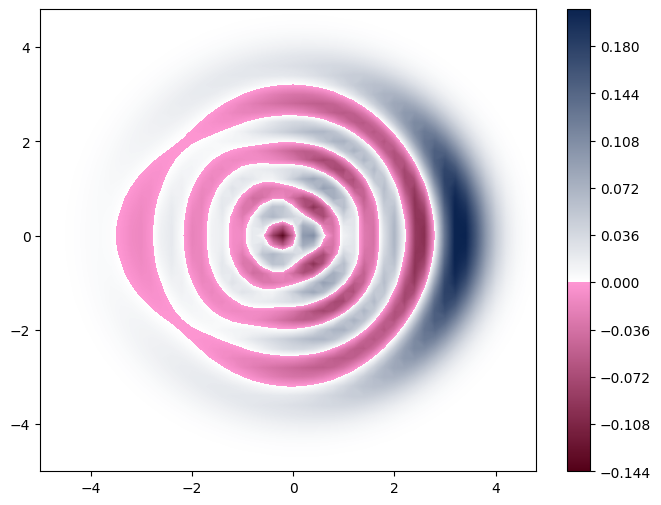

In [ ]:
x = dm_8126_q
xvec = np.arange(-5, 5, 10.0 / 50)
yvec = xvec
W_j = wigner(x, xvec, yvec)
cmap = wigner_cmap(W_j)
X, Y = np.meshgrid(xvec, yvec)
fig = plt.figure(figsize=(8,6))
plt.contourf(X, Y, W_j, 500, cmap=cmap)
plt.colorbar()
plt.savefig('/content/drive/MyDrive/NextGIS/Artwork/wigner_map_8126.jpeg', dpi=300)

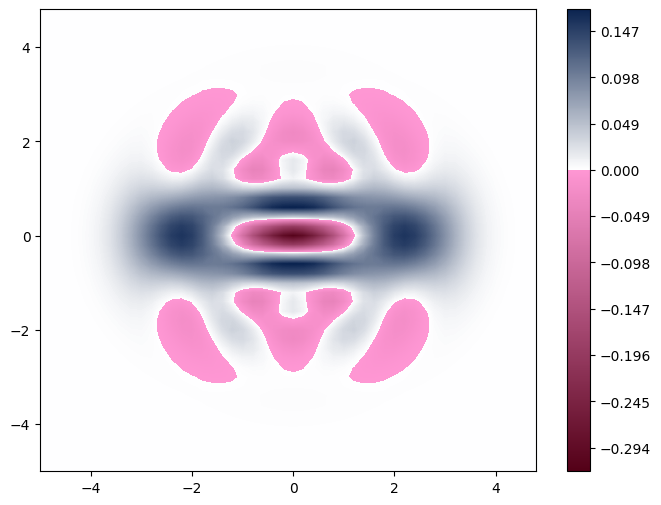

In [ ]:
x = dm_8041_q
xvec = np.arange(-5, 5, 10.0 / 50)
yvec = xvec
W_j = wigner(x, xvec, yvec)
cmap = wigner_cmap(W_j)
X, Y = np.meshgrid(xvec, yvec)
fig = plt.figure(figsize=(8,6))
plt.contourf(X, Y, W_j, 500, cmap=cmap)
plt.colorbar()
plt.savefig('/content/drive/MyDrive/NextGIS/Artwork/wigner_map_8041.jpeg', dpi=300)

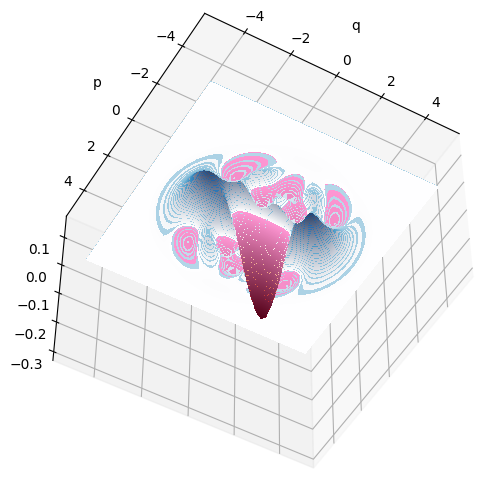

In [ ]:
x = dm_8041_q
xvec = np.arange(-5, 5, 10.0 / 50)
yvec = xvec
W_j = wigner(x, xvec, yvec)
cmap = wigner_cmap(W_j)
X, Y = np.meshgrid(xvec, yvec)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.contourf(X, Y, W_j, 100, cmap='RdBu')
ax.view_init(elev=-50, azim=-120)
ax.set_xlabel('q')
ax.set_ylabel('p')
#ax.set_zlabel('Wigner function')
plt.contourf(X, Y, W_j, 500, cmap=cmap)
#plt.colorbar()
#plt.savefig('/content/drive/MyDrive/NextGIS/Artwork/wigner_map_8041_3d.jpeg', dpi=300)

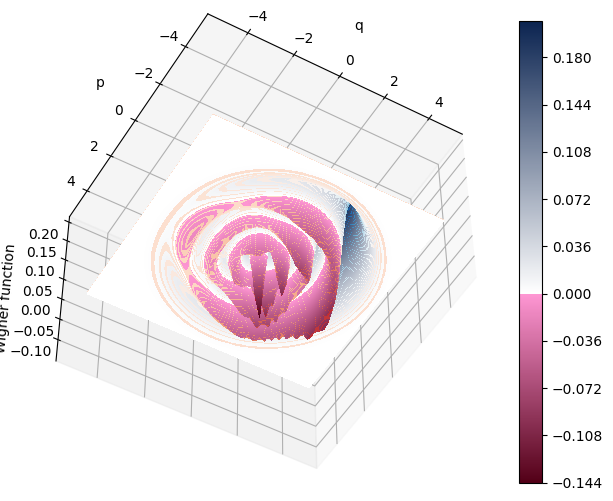

In [ ]:
x = dm_8126_q
xvec = np.arange(-5, 5, 10.0 / 50)
yvec = xvec
W_j = wigner(x, xvec, yvec)
cmap = wigner_cmap(W_j)
X, Y = np.meshgrid(xvec, yvec)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.contourf(X, Y, W_j, 100, cmap='RdBu')
ax.view_init(elev=-50, azim=-120)
ax.set_xlabel('q')
ax.set_ylabel('p')
ax.set_zlabel('Wigner function')
plt.contourf(X, Y, W_j, 500, cmap=cmap)
plt.colorbar()
#plt.savefig('/content/drive/MyDrive/NextGIS/Artwork/wigner_map_8041.jpeg', dpi=300)

## Evolving rho

In [ ]:
import numpy as np
import scipy.linalg as la

def evolve(rho, H, t):
    """
    Evolve a diagonal density matrix using the Schrodinger equation.
    """
    # Calculate the unitary operator for time t
    U = la.expm(-1j * H * t)

    # Calculate the evolved density matrix
    rho_evolved = U @ rho @ U.conj().T

    return rho_evolved

# Define the diagonal density matrix
rho = np.diag([0.2, 0.3, 0.5])

# Define the Hamiltonian
H = np.diag([1,2,3,4,4,3,2,1])

# Evolve the density matrix for time t=1
t = 100
# rho_evolved = evolve(rho, H, t)

# # Print the results
# print("Initial density matrix:\n", rho)
# print("Evolved density matrix:\n", rho_evolved)


In [ ]:
wick_evolved = evolve(dm_8041, H, t= 12)
print("Wick Park evolved:\n", wick_evolved)

Wick Park evolved:
 [[ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.48979592-1.83837187e-18j
   0.        +0.00000000e+00j  0.17992643-3.84124343e-01j
   0.        +0.00000000e+00j  0.16873564-1.07292233e-01j
   0.        +0.00000000e+00j  0.14612935+9.29177997e-02j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.17992643+3.84124343e-01j
   0.        +0.00000000e+00j  0.36734694-1.68072657e-18j
   0.        +0.00000000e+00j  0.14612935+9.29177997e-02j
   0.        +0.00000000e+00j -0.01919056+1.48735845e-01j]
 [ 0.        +0.00000000e+00j  0.        +0.0000

In [ ]:
aus_evolved = evolve(dm_8126, H, t)
print("Austintown evolved:\n", aus_evolved)

Austintown evolved:
 [[ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.000

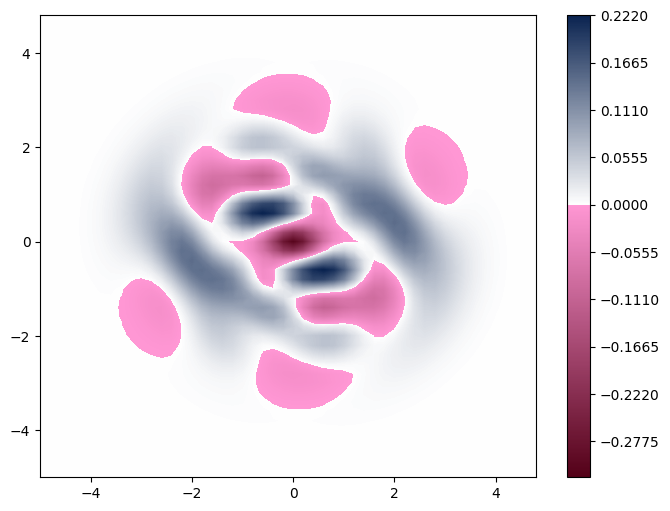

In [ ]:
wp = Qobj(wick_evolved)
x = wp
xvec = np.arange(-5, 5, 10.0 / 50)
yvec = xvec
W_j = wigner(x, xvec, yvec)
cmap = wigner_cmap(W_j)
X, Y = np.meshgrid(xvec, yvec)
fig = plt.figure(figsize=(8,6))
plt.contourf(X, Y, W_j, 500, cmap=cmap)
plt.colorbar()
plt.savefig('/content/drive/MyDrive/NextGIS/Artwork/wigner_map_wick_10.jpeg', dpi=300)

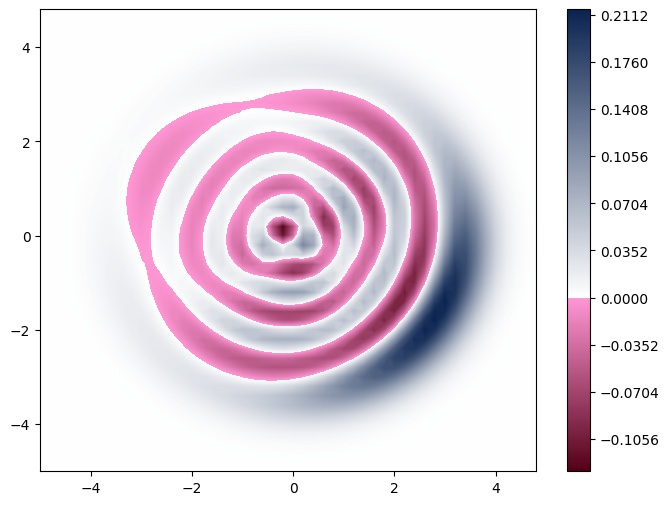

In [ ]:
aus = Qobj(aus_evolved)
x = aus
xvec = np.arange(-5, 5, 10.0 / 50)
yvec = xvec
W_j = wigner(x, xvec, yvec)
cmap = wigner_cmap(W_j)
X, Y = np.meshgrid(xvec, yvec)
fig = plt.figure(figsize=(8,6))
plt.contourf(X, Y, W_j, 500, cmap=cmap)
plt.colorbar()
plt.savefig('/content/drive/MyDrive/NextGIS/Artwork/wigner_map_wick_10.jpeg', dpi=300)